In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to the root directory
root_path = r"C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b"
images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for folder_name in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                image_path = os.path.join(folder_path, file_name)
                # Extract label from the file name (assuming the label is the third part split by underscores)
                label = file_name.split('_')[1]
                img = cv2.imread(image_path)
                if img is None:
                    print(f"Failed to load image: {image_path}")
                else:
                    img = cv2.resize(img, (128, 128))  # Resize the image to a consistent size
                    images.append(img)
                    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Number of images:", len(images))  # Add this line
print("Number of labels:", len(labels))  # Add this line


# Encode labels into numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.1_Ç_27.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.1_ç_55.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.1_Ö_28.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.1_ö_56.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2_Ç_27.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2_ç_62.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2_Ö_28.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2_ö_63.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2_Ü_30.jpg
Failed to load image: C:\Users\ezgi\Desktop\'23-'24 fall\deep learning\term project\b\1\1.2

1/1 [==============================] - 0s 68ms/step


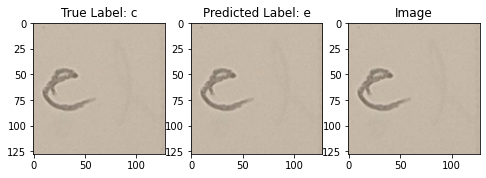

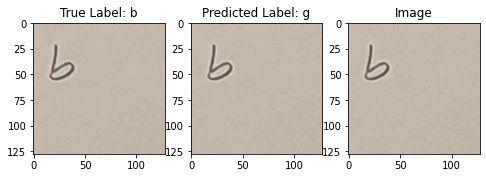

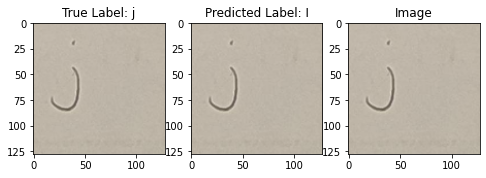

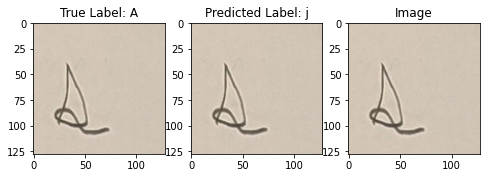

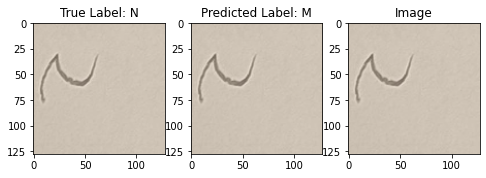

In [13]:
import matplotlib.pyplot as plt
import random

# Predictions on a few test samples
num_samples_to_plot = 5
random_indices = random.sample(range(len(X_test)), num_samples_to_plot)

# Make predictions on the selected samples
predictions = model.predict(X_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test[random_indices]

# Display true label, predicted label, and the image itself
for i in range(num_samples_to_plot):
    plt.figure(figsize=(8, 4))
    
    # True label
    plt.subplot(1, 3, 1)
    plt.title(f'True Label: {label_encoder.classes_[true_labels[i]]}')
    plt.imshow(X_test[random_indices[i]])

    # Predicted label
    plt.subplot(1, 3, 2)
    plt.title(f'Predicted Label: {label_encoder.classes_[predicted_labels[i]]}')
    plt.imshow(X_test[random_indices[i]])

    # Image itself
    plt.subplot(1, 3, 3)
    plt.title('Image')
    plt.imshow(X_test[random_indices[i]])

    plt.show()


37/37 [==============================] - 3s 66ms/step - loss: 4.4064 - accuracy: 0.3594
Test loss: 4.4064, Test accuracy: 35.94%
37/37 [==============================] - 2s 54ms/step


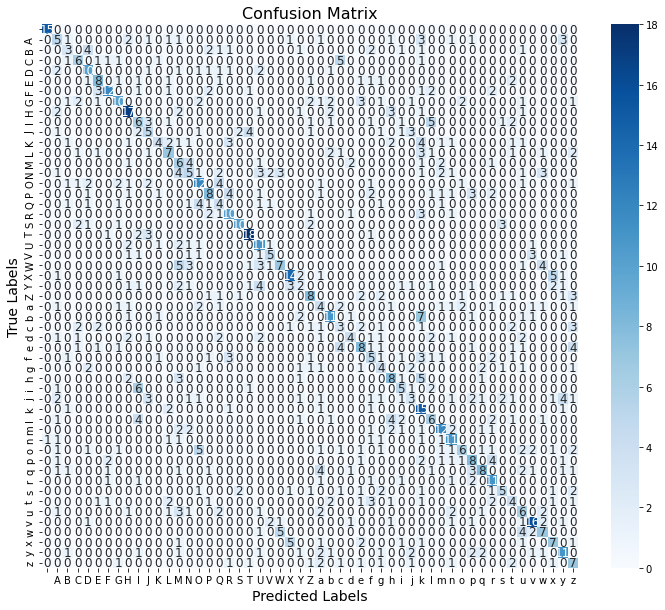

Classification Report:
              precision    recall  f1-score   support

                   0.94      1.00      0.97        15
           A       0.22      0.23      0.22        22
           B       0.23      0.18      0.20        17
           C       0.38      0.35      0.36        17
           D       0.42      0.48      0.44        21
           E       0.44      0.42      0.43        19
           F       0.63      0.48      0.55        25
           G       0.48      0.33      0.39        30
           H       0.50      0.57      0.53        30
           I       0.23      0.27      0.25        22
           J       0.25      0.24      0.24        21
           K       0.44      0.17      0.25        23
           L       0.37      0.33      0.35        21
           M       0.17      0.33      0.22        18
           N       0.24      0.17      0.20        29
           O       0.36      0.40      0.38        30
           P       0.40      0.30      0.34        27
    

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ... (your existing code)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

# Predictions on the entire test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert numerical labels back to original labels
true_labels_original = label_encoder.inverse_transform(y_test)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels_original, predicted_labels_original)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, annot_kws={"fontsize": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(true_labels_original, predicted_labels_original))
